In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [6]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                      

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping])

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 36s 74ms/step - loss: 0.4171 - accuracy: 0.7905 - val_loss: 0.2898 - val_accuracy: 0.8845
Epoch 2/100
469/469 [==============================] - 35s 74ms/step - loss: 0.2327 - accuracy: 0.9100 - val_loss: 0.2786 - val_accuracy: 0.8832
Epoch 3/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1830 - accuracy: 0.9319 - val_loss: 0.2730 - val_accuracy: 0.8885
Epoch 4/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1419 - accuracy: 0.9499 - val_loss: 0.3004 - val_accuracy: 0.8827
Epoch 5/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1180 - accuracy: 0.9582 - val_loss: 0.3307 - val_accuracy: 0.8875
Epoch 6/100
782/782 [==============================] - 14s 17ms/step - loss: 0.3882 - accuracy: 0.8802

 Test Accuracy: 0.8802


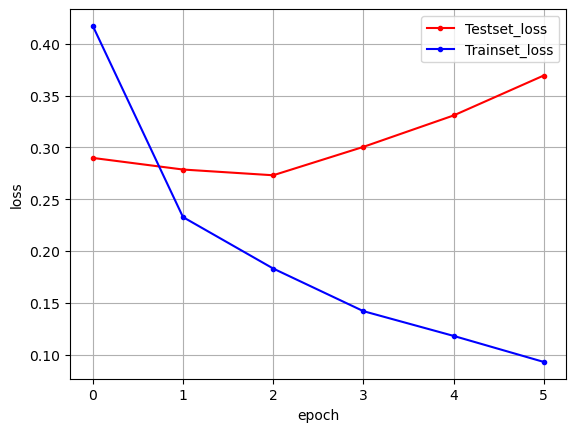

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()